<a href="https://colab.research.google.com/github/vishvas-chauhan/First_Repository/blob/master/Data_hawk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

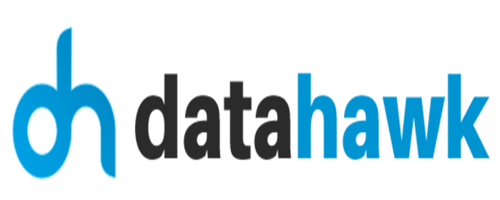

In [ ]:
#@title Data_hawk_project
from PIL import Image 
import requests
url= 'https://www.cfnews.net/var/cfnews/storage/images/_aliases/reference/mediatheque/hd/standard-hd/logos/datahawk-art-logo-2019/9617663-1-fre-FR/Datahawk-ART-logo-2019.jpg'
im = Image.open(requests.get(url, stream=True).raw)
im.resize((500,200))

In [ ]:
#@title Import necessary library & Cloud API connection with spreadsheet
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from google.colab import files
import gspread
import gspread_dataframe as gd
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#Reading and converting data from sheet
ss = gc.open("datahawk").worksheet("rawdata")
df = gd.get_as_dataframe(ss)

In [ ]:
df.columns

Index(['Date', 'Rank', 'ASIN', 'Link', 'Name', 'Rating', 'Reviews', 'Price',
       'Prime', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'],
      dtype='object')

In [ ]:
df=df[['Date', 'Rank', 'ASIN', 'Link','Rating', 'Reviews']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2998 non-null   object 
 1   Rank     2998 non-null   int64  
 2   ASIN     2998 non-null   object 
 3   Link     2998 non-null   object 
 4   Rating   2993 non-null   float64
 5   Reviews  2993 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 140.7+ KB


In [ ]:
#df.dropna(axis=1,inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.Date=pd.to_datetime(df.Date)

In [ ]:
df.head()

,Date,Rank,ASIN,Link,Rating,Reviews
0,2019-11-07,5,B074QTSBS2,https://www.amazon.com/dp/B074QTSBS2,4.0,31441.0
1,2019-11-08,4,B074QTSBS2,https://www.amazon.com/dp/B074QTSBS2,4.0,31441.0
2,2019-11-09,5,B074QTSBS2,https://www.amazon.com/dp/B074QTSBS2,4.0,31441.0
3,2019-11-10,4,B074QTSBS2,https://www.amazon.com/dp/B074QTSBS2,4.0,31441.0
4,2019-11-11,10,B074QTSBS2,https://www.amazon.com/dp/B074QTSBS2,4.0,31441.0


In [ ]:
#creating a list of top 100 out of 270 bases on reviews 
list_top_10= list(df[['ASIN','Reviews']].sort_values(by='Reviews',ascending=False).drop_duplicates().head(100)['ASIN'])

In [ ]:
df.nunique()

Date        30
Rank       100
ASIN       270
Link       270
Rating      23
Reviews    250
dtype: int64

In [ ]:
df.shape

(2998, 6)

In [ ]:
df=df[df.ASIN.isin(list_top_10)]

In [ ]:
df.shape

(1654, 6)

In [ ]:
#[x for x in df['ASIN'] if x in list_top_10]

In [ ]:
dft= df.pivot(index='ASIN', columns='Date', values='Rank')

In [ ]:
dft.head()

Date,2019-11-07,2019-11-08,2019-11-09,2019-11-10,2019-11-11,2019-11-12,2019-11-13,2019-11-14,2019-11-15,2019-11-16,2019-11-17,2019-11-18,2019-11-19,2019-11-20,2019-11-21,2019-11-22,2019-11-23,2019-11-24,2019-11-25,2019-11-26,2019-11-27,2019-11-28,2019-11-29,2019-11-30,2019-12-01,2019-12-02,2019-12-03,2019-12-04,2019-12-05,2019-12-06
ASIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B000IHJF60,NaN,97.0,96.0,17.0,61.0,56.0,31.0,68.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000TDMUDS,NaN,NaN,NaN,99.0,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B002HZHUCW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,87.0,80.0,77.0,66.0,59.0,56.0,74.0,83.0,60.0,64.0,NaN,88.0,85.0,75.0
B003DYZQKY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,90.0,NaN,NaN,NaN,NaN,NaN,90.0,NaN,90.0,99.0,80.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B003JFBXMM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,93.0,76.0


In [ ]:
dft= dft.fillna(0)
dft=dft.reset_index()

In [ ]:
#dft=dft.reset_index(drop=True)

In [ ]:
#dft.columns[1:]

In [ ]:
import datetime
import pandas as pd
date=datetime.date.today()
def get_date(row):
    date_range = row[dft.columns[1:]]
    closest_date_key = abs(100 - date_range).argmin()
    closest_date = date_range[closest_date_key]
    column_name = date_range.keys()[closest_date_key]
    return pd.Series((closest_date, column_name))

#dft[['Requirement 1', 'Requirement 2']] = dft.apply(lambda row:get_date(row), axis=1)

In [ ]:
dft.head(3)

Date,ASIN,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00
0,B000IHJF60,0.0,97.0,96.0,17.0,61.0,56.0,31.0,68.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B000TDMUDS,0.0,0.0,0.0,99.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B002HZHUCW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,87.0,80.0,77.0,66.0,59.0,56.0,74.0,83.0,60.0,64.0,0.0,88.0,85.0,75.0


In [ ]:
#dft.columns[(dft == 1.0).iloc[40]]

In [ ]:
u = dft.set_index("ASIN").replace(0,np.nan)

In [ ]:
u.head(2)

Date,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00
ASIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B000IHJF60,NaN,97.0,96.0,17.0,61.0,56.0,31.0,68.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B000TDMUDS,NaN,NaN,NaN,99.0,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
most_recent_BSR_date = u.iloc[:,::-1].idxmin(1)
worst_date_rank= u.iloc[:,::-1].idxmax(1)
worst_rank= u.iloc[:,::-1].max(1)
most_recent_BSR = u.iloc[:,::-1].min(1)
Days_spent_in_top_100= u.notnull().sum(axis=1)

out = u.assign(most_recent_BSR_date=most_recent_BSR_date, worst_date_rank=worst_date_rank,
         worst_rank=worst_rank,most_recent_BSR=most_recent_BSR,Days_spent_in_top_100=Days_spent_in_top_100).reset_index()

In [ ]:
out.head(3)

Date,ASIN,2019-11-07 00:00:00,2019-11-08 00:00:00,2019-11-09 00:00:00,2019-11-10 00:00:00,2019-11-11 00:00:00,2019-11-12 00:00:00,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-11-15 00:00:00,2019-11-16 00:00:00,2019-11-17 00:00:00,2019-11-18 00:00:00,2019-11-19 00:00:00,2019-11-20 00:00:00,2019-11-21 00:00:00,2019-11-22 00:00:00,2019-11-23 00:00:00,2019-11-24 00:00:00,2019-11-25 00:00:00,2019-11-26 00:00:00,2019-11-27 00:00:00,2019-11-28 00:00:00,2019-11-29 00:00:00,2019-11-30 00:00:00,2019-12-01 00:00:00,2019-12-02 00:00:00,2019-12-03 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,most_recent_BSR_date,worst_date_rank,worst_rank,most_recent_BSR,Days_spent_in_top_100
0,B000IHJF60,NaN,97.0,96.0,17.0,61.0,56.0,31.0,68.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-10,2019-11-08,97.0,17.0,8
1,B000TDMUDS,NaN,NaN,NaN,99.0,NaN,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-12,2019-11-10,99.0,86.0,2
2,B002HZHUCW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,87.0,80.0,77.0,66.0,59.0,56.0,74.0,83.0,60.0,64.0,NaN,88.0,85.0,75.0,2019-11-28,2019-11-22,92.0,56.0,14


In [ ]:
out['first_day_rank']=out.iloc[:,1:].fillna(method='bfill', axis=1).iloc[:, 0]


In [ ]:
out['last_day_rank']=out.iloc[:,1:31].fillna(method='ffill', axis=1).iloc[:, -1]

In [ ]:
out['first_entered_day']= out.iloc[:,1:].apply(pd.Series.first_valid_index, axis=1)


In [ ]:
out.iloc[:,1:31]=out.iloc[:,1:31].fillna(0)

In [ ]:
from google.colab import files

In [ ]:

Concateall = gc.open("datahawk").worksheet("Sheet10")
#df_Concateall = gd.get_as_dataframe(Concateall)
Concateall.clear()
gd.set_with_dataframe(Concateall, out)

In [ ]:
stop

NameError: ignored

In [ ]:
#finding correlation and understanding of ranking system
ss = gc.open("datahawk").worksheet("rawdata")
df = gd.get_as_dataframe(ss)




In [ ]:
df=df[['Date', 'Rank', 'ASIN', 'Link', 'Name', 'Rating', 'Reviews', 'Price','Prime']]

In [ ]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

In [ ]:
df=df.astype(str)
fit = df.apply(lambda x: d[x.name].fit_transform(x))
import seaborn as sns
corr = fit.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [ ]:
import pandas 
import datetime
d = {'ID': ["id1","id2"], '26-01-2021': [0, 15],'01-02-2021': [12, 17],'01-03-2021': [58, 17]}
df = pd.DataFrame(data=d)
df


In [ ]:

d = {'ID': ["id1","id2"], '26-01-2021': [0, 15],'01-02-2021': [12, 17],'01-03-2021': [58, 17],
     'first_date_rank': ['01-02-2021','26-01-2021'],'last_date_rank': ['01-03-2021', '01-03-2021'],'best_latest_date_rank': ['01-02-2021', '26-01-2021'],
     'best_rank':[12,15]}
df = pd.DataFrame(data=d)
df

In [ ]:
def get_date(row):
    date_range = row[dft.columns[1:]]
    closest_value_key = abs(100 - date_range).argmin()
    closest_date = date_range[closest_value_key]
    column_name = date_range.keys()[closest_value_key]
    return pd.Series((closest_date, column_name))

dft[['best_latest_date_rank', 'best_rank']] = dft.apply(lambda row:get_date(row), axis=1)

##extra

In [ ]:
sales= files.upload()

In [ ]:
adv= files.upload()

In [ ]:
dfsale= pd.read_csv(r'Sales-Oct-2020.csv')
dfadv= pd.read_csv(r'Advertising-Oct-2020.csv')

In [ ]:
dfframe= [dfsale,dfadv]
#lower case column names for easy typing For example {SponsoredType to sponsoredtype}
for x in dfframe:
  x.columns =x.columns.str.lower()

In [ ]:
dfsale.drop_duplicates(inplace=True)
dfsale=dfsale[dfsale.sales>0]

dfsale.head()

In [ ]:
dfadv.drop_duplicates(inplace=True)
dfadv=dfadv[dfadv.sales>0]
dfadv.head()


In [ ]:
#checking the shape of both dataframe
dfsale.shape,dfadv.shape

In [ ]:
#checing unique items in columns
dfsale.nunique(),dfadv.nunique()

In [ ]:
#checking null values
dfsale.isnull().sum()

In [ ]:
 #checking null values
 dfadv.isnull().sum()

In [ ]:
#checking if null value is impacting the sponsored products or not 
dfadv[dfadv.isnull().any(axis=1)].sponsoredtype.value_counts()

In [ ]:
#checking items type in column 
dfadv.sponsoredtype.value_counts()

In [ ]:
#seperating sponsered products from dataframe
dfadv_sp= dfadv[dfadv.sponsoredtype=='SponsoredProducts'].reset_index()

In [ ]:
dfadv_sp.drop(columns='index',inplace=True)

In [ ]:
dfadv_sp.head()

In [ ]:
dfsale[dfsale.accountid=='1C457BA989F8297719F8079890EA605C']

In [ ]:
#Top 10 Sellers that used the SponsoredType 'SponsoredProducts' ordered by the number of orders descending
df = dfsale.merge(dfadv_sp,on='accountid',how='left')


In [ ]:
#Top 10 Sellers that used the SponsoredType 'SponsoredProducts' ordered by the number of orders descending
df =df[df.sponsoredtype=='SponsoredProducts']
df.groupby('accountid')['orders'].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
#Average price per Marketplace per day
dfsale['price']=dfsale.sales/dfsale.quantity